# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Solomon Islands', 'Holy See', 'Timor-Leste'],
 3: ['Tanzania', 'Laos', 'Saint Kitts and Nevis'],
 4: ['Saint Lucia', 'Grenada', 'Dominica', 'Brunei'],
 5: ['Fiji', 'Equatorial Guinea'],
 6: ['Antigua and Barbuda', 'Mauritius', 'Saint Vincent and the Grenadines'],
 7: ['Gambia'],
 8: ['Liechtenstein', 'Monaco', 'Kyrgyzstan', 'Northern Mariana Islands',
     'Cambodia', 'Trinidad and Tobago', 'Vietnam', 'Seychelles', 'Bahamas',
     'Madagascar'],
 9: ['Malawi', 'Barbados', 'Sao Tome and Principe', 'Ghana', 'Bolivia',
     'Suriname', 'Lesotho', 'Bermuda', 'Virgin Islands, U.S.', 'Kazakhstan',
     'Belize', 'Zambia', 'Australia', 'Swaziland', 'Burundi', 'Zimbabwe',
     'Republic of the Congo', 'Djibouti', 'South Africa', 'Uzbekistan',
     'Oman'],
 10: ['Benin', 'Jamaica', 'Syria', 'Central African Republic', 'Namibia',
      'Mozambique', 'Philippines', 'Angola', 'Bhutan', 'Kuwait', 'Gabon',
      'Comoros', 'Papua New Guinea', 'Ethiopia', 'Botswana', 'Libya', 'Bahrain',
      

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

8

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Belgium', 'Netherlands', 'United Kingdom', 'Denmark', 'Portugal',
      'Austria', 'Ukraine'],
 17: ['France']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
France  0th    Past  07Feb2020  30Mar2020    66977107
        1st    Past  31Mar2020  22Apr2020    66977107
        2nd    Past  23Apr2020  08Jul2020    66977107
        3rd    Past  09Jul2020  18Aug2020    66977107
        4th    Past  19Aug2020  02Sep2020    66977107
        5th    Past  03Sep2020  14Sep2020    66977107
        6th    Past  15Sep2020  22Sep2020    66977107
        7th    Past  23Sep2020  01Oct2020    66977107
        8th    Past  02Oct2020  08Oct2020    66977107
        9th    Past  09Oct2020  15Oct2020    66977107
        10th   Past  16Oct2020  21Oct2020    66977107
        11th   Past  22Oct2020  31Oct2020    66977107
        12th   Past  01Nov2020  10Nov2020    66977107
        13th   Past  11Nov2020  16Nov2020    66977107
        14th   Past  17Nov2020  24Nov2020    66977107
        15th   Past  25Nov2020  03Dec2020    66977107
        16th   Past  04Dec2020  13Dec2020    66977107

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	AUT,  4th phase (18Aug2020 - 06Sep2020): finished  237 trials in 0 min 10 sec

	GBR,  2nd phase (24Apr2020 - 11May2020): finished  230 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 01Apr2020): finished  226 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	UKR,  0th phase (21Mar2020 - 30May2020): finished  235 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	UKR,  5th phase (17Sep2020 - 30Sep2020): finished  264 trials in 0 min 10 sec

	FRA, 16th phase (04Dec2020 - 13Dec2020): finished  275 trials in 0 min 10 sec

	FRA,  4th phase (19Aug2020 - 02Sep2020): finished  282 trials in 0 min 10 sec

	FRA, 10th phase (16Oct2020 - 21Oct2020): finished  283 trials in 0 min 10 sec

	NLD,  1st phase (01Apr2020 - 16Apr2020): finished  286 trials in 0 min 10 sec

	BEL, 13th phase (15Nov2020 - 22Nov2020): finished  249 trials in 0 min 10 sec

	UKR,  3rd phase (12Aug2020 - 31Aug2020): finished  270 trials in 0 min 10 sec

	UKR,  8th phase (22Oct2020 - 29Oct2020): finished  276 trials in 0 min 10 sec

	NLD,  6th phase (19Sep2020 - 27Sep2020): finished  290 trials in 0 min 10 sec

	DNK, 13th phase (17Nov2020 - 22Nov2020): finished  261 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	AUT, 13th phase (20Nov2020 - 30Nov2020): finished  265 trials in 0 min 10 sec

	BEL,  2nd phase (14Apr2020 - 07May2020): finished  282 trials in 0 min 10 sec

	FRA,  9th phase (09Oct2020 - 15Oct2020): finished  261 trials in 0 min 10 sec

	DNK,  2nd phase (03May2020 - 12Jun2020): finished  258 trials in 0 min 10 sec

	NLD, 15th phase (03Dec2020 - 13Dec2020): finished  253 trials in 0 min 10 sec

	BEL,  9th phase (13Oct2020 - 22Oct2020): finished  249 trials in 0 min 10 sec

	DNK,  5th phase (09Sep2020 - 20Sep2020): finished  253 trials in 0 min 10 sec

	AUT, 15th phase (07Dec2020 - 13Dec2020): finished  256 trials in 0 min 10 sec

	GBR,  1st phase (07Apr2020 - 23Apr2020): finished  264 trials in 0 min 10 sec

	PRT,  1st phase (02Apr2020 - 18Apr2020): finished  285 trials in 0 min 10 sec

	UKR,  2nd phase (09Jul2020 - 11Aug2020): finished  262 trials in 0 min 10 sec

	PRT,  5th phase (15Jul2020 - 25Aug2020): finished  291 trials in 0 min 10 sec

	PRT, 10th phase (22Oct2020 - 27Oct2020): finished  286 trials in 0 min 10 sec

	NLD,  3rd phase (22May2020 - 07Aug2020): finished  258 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  257 trials in 0 min 10 sec

	BEL,  1st phase (31Mar2020 - 13Apr2020): finished  267 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 28Sep2020): finished  274 trials in 0 min 10 sec

	FRA,  6th phase (15Sep2020 - 22Sep2020): finished  304 trials in 0 min 10 sec

	NLD, 13th phase (20Nov2020 - 25Nov2020): finished  301 trials in 0 min 10 sec

	GBR,  7th phase (03Oct2020 - 11Oct2020): finished  301 trials in 0 min 10 sec

	GBR,  5th phase (18Aug2020 - 17Sep2020): finished  263 trials in 0 min 10 sec

	UKR,  1st phase (31May2020 - 08Jul2020): finished  277 trials in 0 min 10 sec

	PRT,  4th phase (19Jun2020 - 14Jul2020): finished  318 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  295 trials in 0 min 10 sec

	AUT,  1st phase (25Mar2020 - 08Apr2020): finished  286 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	AUT, 11th phase (31Oct2020 - 09Nov2020): finished  259 trials in 0 min 10 sec

	UKR, 11th phase (13Nov2020 - 18Nov2020): finished  264 trials in 0 min 10 sec

	FRA,  0th phase (07Feb2020 - 30Mar2020): finished  246 trials in 0 min 10 sec

	GBR,  8th phase (12Oct2020 - 19Oct2020): finished  301 trials in 0 min 10 sec

	GBR,  9th phase (20Oct2020 - 25Oct2020): finished  334 trials in 0 min 10 sec

	BEL,  0th phase (13Mar2020 - 30Mar2020): finished  260 trials in 0 min 10 sec

	NLD,  4th phase (08Aug2020 - 04Sep2020): finished  307 trials in 0 min 10 sec

	GBR, 15th phase (05Dec2020 - 13Dec2020): finished  280 trials in 0 min 10 sec

	NLD,  8th phase (05Oct2020 - 14Oct2020): finished  309 trials in 0 min 10 sec

	NLD,  0th phase (11Mar2020 - 31Mar2020): finished  294 trials in 0 min 10 sec

	DNK,  0th phase (19Mar2020 - 12Apr2020): finished  324 trials in 0 min 10 sec

	AUT,  7th phase (28Sep2020 - 06Oct2020): finished  333 trials in 0 min 10 sec

	PRT,  6th phase (26Aug2020 - 15Sep2020): finished  341 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK,  7th phase (01Oct2020 - 12Oct2020): finished  304 trials in 0 min 10 sec

	AUT,  2nd phase (09Apr2020 - 10Jul2020): finished  307 trials in 0 min 10 sec

	FRA, 13th phase (11Nov2020 - 16Nov2020): finished  333 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 14th phase (17Nov2020 - 24Nov2020): finished  335 trials in 0 min 10 sec

	BEL, 11th phase (02Nov2020 - 07Nov2020): finished  292 trials in 0 min 10 sec

	FRA, 15th phase (25Nov2020 - 03Dec2020): finished  297 trials in 0 min 10 sec

	GBR,  4th phase (12Jun2020 - 17Aug2020): finished  289 trials in 0 min 10 sec

	BEL, 10th phase (23Oct2020 - 01Nov2020): finished  293 trials in 0 min 10 sec

	UKR,  6th phase (01Oct2020 - 11Oct2020): finished  239 trials in 0 min 10 sec

	PRT,  8th phase (02Oct2020 - 13Oct2020): finished  243 trials in 0 min 10 sec

	PRT, 13th phase (13Nov2020 - 22Nov2020): finished  225 trials in 0 min 10 sec

	BEL, 14th phase (23Nov2020 - 01Dec2020): finished  222 trials in 0 min 10 sec

	NLD,  9th phase (15Oct2020 - 24Oct2020): finished  354 trials in 0 min 10 sec

	GBR, 12th phase (12Nov2020 - 17Nov2020): finished  362 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR, 10th phase (26Oct2020 - 05Nov2020): finished  360 trials in 0 min 10 sec

	DNK,  9th phase (23Oct2020 - 29Oct2020): finished  363 trials in 0 min 10 sec

	FRA,  5th phase (03Sep2020 - 14Sep2020): finished  362 trials in 0 min 10 sec

	BEL,  3rd phase (08May2020 - 27Jul2020): finished  337 trials in 0 min 10 sec

	PRT,  3rd phase (21May2020 - 18Jun2020): finished  354 trials in 0 min 10 sec

	GBR, 13th phase (18Nov2020 - 25Nov2020): finished  360 trials in 0 min 10 sec

	DNK, 11th phase (05Nov2020 - 10Nov2020): finished  366 trials in 0 min 10 sec

	PRT,  2nd phase (19Apr2020 - 20May2020): finished  358 trials in 0 min 10 sec

	BEL, 12th phase (08Nov2020 - 14Nov2020): finished  366 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	UKR,  7th phase (12Oct2020 - 21Oct2020): finished  362 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD,  7th phase (28Sep2020 - 04Oct2020): finished  367 trials in 0 min 10 sec

	FRA,  8th phase (02Oct2020 - 08Oct2020): finished  369 trials in 0 min 10 sec

	PRT,  9th phase (14Oct2020 - 21Oct2020): finished  367 trials in 0 min 10 sec

	FRA,  2nd phase (23Apr2020 - 08Jul2020): finished  341 trials in 0 min 10 sec

	UKR, 12th phase (19Nov2020 - 24Nov2020): finished  368 trials in 0 min 10 sec

	AUT,  0th phase (05Mar2020 - 24Mar2020): finished  362 trials in 0 min 10 sec

	AUT,  9th phase (15Oct2020 - 20Oct2020): finished  367 trials in 0 min 10 sec

	GBR,  0th phase (18Feb2020 - 06Apr2020): finished  351 trials in 0 min 10 sec

	UKR,  4th phase (01Sep2020 - 16Sep2020): finished  363 trials in 0 min 10 sec

	AUT, 14th phase (01Dec2020 - 06Dec2020): finished  370 trials in 0 min 10 sec

	DNK, 10th phase (30Oct2020 - 04Nov2020): finished  368 trials in 0 min 10 sec

	PRT,  7th phase (16Sep2020 - 01Oct2020): finished  362 trials in 0 min 10 sec

	BEL,  8th phase (07Oct2020 - 12Oct2020): finished  369 trials in 0 min 10 sec

	AUT,  3rd phase (11Jul2020 - 17Aug2020): finished  357 trials in 0 min 10 sec

	UKR, 10th phase (06Nov2020 - 12Nov2020): finished  366 trials in 0 min 10 sec

	NLD,  2nd phase (17Apr2020 - 21May2020): finished  353 trials in 0 min 10 sec

	DNK,  4th phase (10Aug2020 - 08Sep2020): finished  358 trials in 0 min 10 sec

	BEL,  7th phase (29Sep2020 - 06Oct2020): finished  369 trials in 0 min 10 sec

	NLD, 10th phase (25Oct2020 - 03Nov2020): finished  361 trials in 0 min 10 sec

	NLD, 12th phase (14Nov2020 - 19Nov2020): finished  359 trials in 0 min 10 sec

	AUT, 12th phase (10Nov2020 - 19Nov2020): finished  365 trials in 0 min 10 sec

	UKR, 13th phase (25Nov2020 - 30Nov2020): finished  365 trials in 0 min 10 sec

	DNK,  3rd phase (13Jun2020 - 09Aug2020): finished  347 trials in 0 min 10 sec

	AUT, 10th phase (21Oct2020 - 30Oct2020): finished  363 trials in 0 min 10 sec

	NLD, 14th phase (26Nov2020 - 02Dec2020): finished  368 trials in 0 min 10 sec

	AUT,  6th phase (17Sep2020 - 27Sep2020): finished  365 trials in 0 min 10 sec

	DNK,  6th phase (21Sep2020 - 30Sep2020): finished  365 trials in 0 min 10 sec

	GBR,  3rd phase (12May2020 - 11Jun2020): finished  355 trials in 0 min 10 sec

	PRT, 12th phase (03Nov2020 - 12Nov2020): finished  371 trials in 0 min 10 sec

	UKR,  9th phase (30Oct2020 - 05Nov2020): finished  357 trials in 0 min 10 sec

	DNK, 14th phase (23Nov2020 - 02Dec2020): finished  354 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	AUT,  5th phase (07Sep2020 - 16Sep2020): finished  372 trials in 0 min 10 sec

	FRA, 11th phase (22Oct2020 - 31Oct2020): finished  370 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD,  5th phase (05Sep2020 - 18Sep2020): finished  368 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  7th phase (23Sep2020 - 01Oct2020): finished  375 trials in 0 min 10 sec

	GBR,  6th phase (18Sep2020 - 02Oct2020): finished  369 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 12th phase (01Nov2020 - 10Nov2020): finished  372 trials in 0 min 10 sec

	FRA,  3rd phase (09Jul2020 - 18Aug2020): finished  364 trials in 0 min 10 sec

	BEL, 15th phase (02Dec2020 - 13Dec2020): finished  372 trials in 0 min 10 sec

	DNK,  1st phase (13Apr2020 - 02May2020): finished  368 trials in 0 min 10 sec

	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  371 trials in 0 min 10 sec

	AUT,  8th phase (07Oct2020 - 14Oct2020): finished  374 trials in 0 min 10 sec

	PRT, 11th phase (28Oct2020 - 02Nov2020): finished  376 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD, 11th phase (04Nov2020 - 13Nov2020): finished  374 trials in 0 min 10 sec

	FRA,  1st phase (31Mar2020 - 22Apr2020): finished  359 trials in 0 min 10 sec

	GBR, 14th phase (26Nov2020 - 04Dec2020): finished  375 trials in 0 min 10 sec

Completed optimization. Total: 5 min 46 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
France  0th    Past  07Feb2020  30Mar2020    66977107  SIR-F  8.95  0.001841   
        1st    Past  31Mar2020  22Apr2020    66977107  SIR-F  0.71  0.346351   
        2nd    Past  23Apr2020  08Jul2020    66977107  SIR-F  0.59  0.537173   
        3rd    Past  09Jul2020  18Aug2020    66977107  SIR-F  1.46  0.000136   
        4th    Past  19Aug2020  02Sep2020    66977107  SIR-F  2.04  0.001289   
        5th    Past  03Sep2020  14Sep2020    66977107  SIR-F  1.68  0.000434   
        6th    Past  15Sep2020  22Sep2020    66977107  SIR-F  1.48  0.000864   
        7th    Past  23Sep2020  01Oct2020    66977107  SIR-F  1.36  0.001278   
        8th    Past  02Oct2020  08Oct2020    66977107  SIR-F  1.18  0.000569   
        9th    Past  09Oct2020  15Oct2020    66977107  SIR-F  1.67  0.001050   
        10th   Past  16Oct2020  21Oct2020    66977107  SIR-F  1.81  0.000490   
        11th   Past  22Oct2020  31Oct2020    66977107  SIR-F  2.52  0.001843   
        12th   Past  01Nov2020  10Nov2020    66977107  SIR-F  1.37  0.000202   
        13th   Past  11Nov2020  16Nov2020    66977107  SIR-F  0.65  0.001978   
        14th   Past  17Nov2020  24Nov2020    66977107  SIR-F  0.41  0.000574   
        15th   Past  25Nov2020  03Dec2020    66977107  SIR-F  0.41  0.005087   
        16th   Past  04Dec2020  13Dec2020    66977107  SIR-F  1.13  0.022552   

                  kappa       rho     sigma  tau  alpha1 [-]  1/alpha2 [day]  \
Country Phase                                                                  
France  0th    0.000059  0.038763  0.004265  360       0.002            4209   
        1st    0.001473  0.024343  0.021055  360       0.346             169   
        2nd    0.000080  0.016951  0.013248  360       0.537            3111   
        3rd    0.000170  0.024477  0.016613  360       0.000            1473   
        4th    0.000071  0.030650  0.014930  360       0.001            3514   
        5th    0.000098  0.026872  0.015898  360       0.000            2549   
        6th    0.000150  0.025987  0.017436  360       0.001            1666   
        7th    0.000079  0.024934  0.018240  360       0.001            3152   
        8th    0.000426  0.028723  0.023946  360       0.001             586   
        9th    0.000152  0.025168  0.014910  360       0.001            1645   
        10th   0.000096  0.027800  0.015224  360       0.000            2598   
        11th   0.000150  0.028712  0.011235  360       0.002            1666   
        12th   0.000257  0.025695  0.018538  360       0.000             974   
        13th   0.000194  0.013372  0.020379  360       0.002            1289   
        14th   0.000426  0.013244  0.031996  360       0.001             586   
        15th   0.000482  0.015334  0.036683  360       0.005             518   
        16th   0.000287  0.023494  0.020018  360       0.023             869   

               1/beta [day]  1/gamma [day]     RMSLE  Trials       Runtime  
Country Phase                                                               
France  0th               6             58  1.400120     246  0 min 10 sec  
        1st              10             11  0.187872     359  0 min 10 sec  
        2nd              14             18  0.340536     341  0 min 10 sec  
        3rd              10             15  0.096520     364  0 min 10 sec  
        4th               8             16  0.031933     282  0 min 10 sec  
        5th               9             15  0.023819     362  0 min 10 sec  
        6th               9             14  0.019375     304  0 min 10 sec  
        7th              10             13  0.033578     375  0 min 10 sec  
        8th               8             10  0.033326     369  0 min 10 sec  
        9th               9             16  0.035339     261  0 min 10 sec  
        10th              8             16  0.031

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
1,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
2,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
3,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
4,2020-03-14,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,2,0,0,0,2,1,2,1,1,50.93


### $Rt$: Reprodcution number $\mathrm{[-]}$

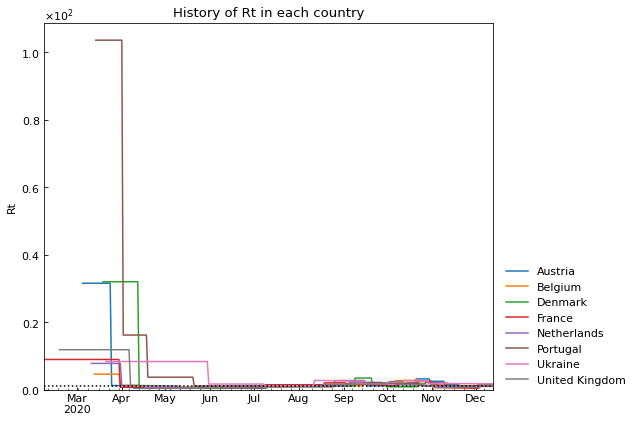

Country,Austria,Belgium,Denmark,France,Netherlands,Portugal,Ukraine,United Kingdom
Date,,,,,,,,
2020-12-09,1.41,0.98,1.14,1.13,1.62,1.18,1.72,1.3
2020-12-10,1.41,0.98,1.14,1.13,1.62,1.18,1.72,1.3
2020-12-11,1.41,0.98,1.14,1.13,1.62,1.18,1.72,1.3
2020-12-12,1.41,0.98,1.14,1.13,1.62,1.18,1.72,1.3
2020-12-13,1.41,0.98,1.14,1.13,1.62,1.18,1.72,1.3


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

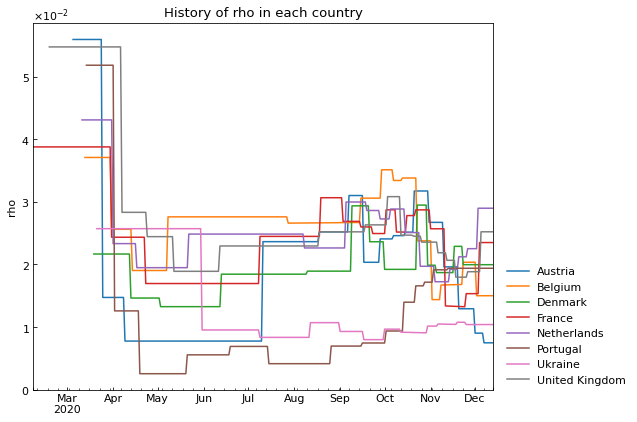

Country,Austria,Belgium,Denmark,France,Netherlands,Portugal,Ukraine,United Kingdom
Date,,,,,,,,
2020-12-09,0.007486,0.015006,0.019958,0.023494,0.028974,0.01939,0.010401,0.025211
2020-12-10,0.007486,0.015006,0.019958,0.023494,0.028974,0.01939,0.010401,0.025211
2020-12-11,0.007486,0.015006,0.019958,0.023494,0.028974,0.01939,0.010401,0.025211
2020-12-12,0.007486,0.015006,0.019958,0.023494,0.028974,0.01939,0.010401,0.025211
2020-12-13,0.007486,0.015006,0.019958,0.023494,0.028974,0.01939,0.010401,0.025211


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

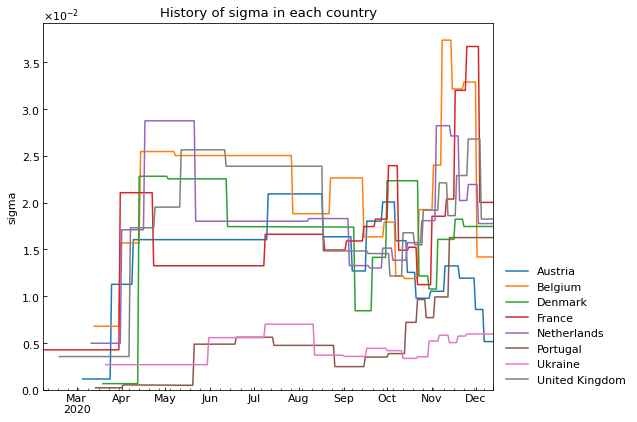

Country,Austria,Belgium,Denmark,France,Netherlands,Portugal,Ukraine,United Kingdom
Date,,,,,,,,
2020-12-09,0.005142,0.014189,0.017445,0.020018,0.017755,0.016255,0.005958,0.018236
2020-12-10,0.005142,0.014189,0.017445,0.020018,0.017755,0.016255,0.005958,0.018236
2020-12-11,0.005142,0.014189,0.017445,0.020018,0.017755,0.016255,0.005958,0.018236
2020-12-12,0.005142,0.014189,0.017445,0.020018,0.017755,0.016255,0.005958,0.018236
2020-12-13,0.005142,0.014189,0.017445,0.020018,0.017755,0.016255,0.005958,0.018236


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

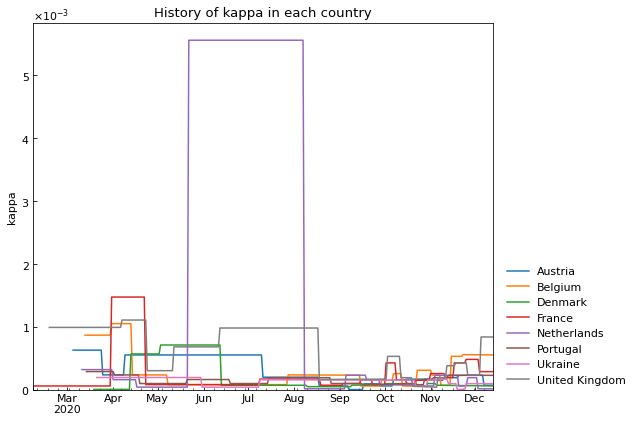

Country,Austria,Belgium,Denmark,France,Netherlands,Portugal,Ukraine,United Kingdom
Date,,,,,,,,
2020-12-09,0.000071,0.000553,0.000059,0.000287,0.000014,0.000229,0.000096,0.000838
2020-12-10,0.000071,0.000553,0.000059,0.000287,0.000014,0.000229,0.000096,0.000838
2020-12-11,0.000071,0.000553,0.000059,0.000287,0.000014,0.000229,0.000096,0.000838
2020-12-12,0.000071,0.000553,0.000059,0.000287,0.000014,0.000229,0.000096,0.000838
2020-12-13,0.000071,0.000553,0.000059,0.000287,0.000014,0.000229,0.000096,0.000838


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

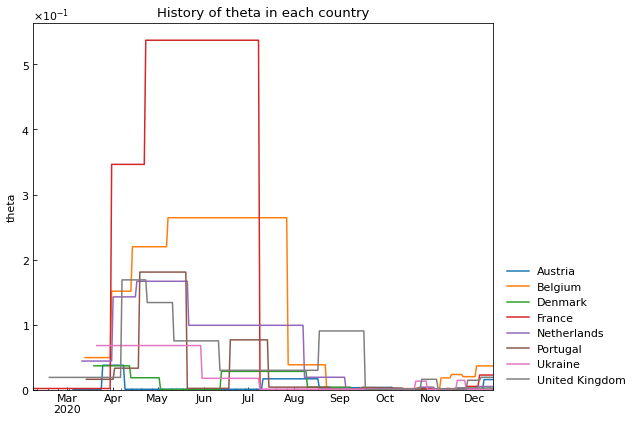

Country,Austria,Belgium,Denmark,France,Netherlands,Portugal,Ukraine,United Kingdom
Date,,,,,,,,
2020-12-09,0.015594,0.036571,0.002389,0.022552,0.004924,0.000121,0.000719,0.019092
2020-12-10,0.015594,0.036571,0.002389,0.022552,0.004924,0.000121,0.000719,0.019092
2020-12-11,0.015594,0.036571,0.002389,0.022552,0.004924,0.000121,0.000719,0.019092
2020-12-12,0.015594,0.036571,0.002389,0.022552,0.004924,0.000121,0.000719,0.019092
2020-12-13,0.015594,0.036571,0.002389,0.022552,0.004924,0.000121,0.000719,0.019092


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25699 entries, 0 to 25796
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 25699 non-null  datetime64[ns]
 1   Country                              25699 non-null  object        
 2   Rt                                   25699 non-null  float64       
 3   theta                                25699 non-null  float64       
 4   kappa                                25699 non-null  float64       
 5   rho                                  25699 non-null  float64       
 6   sigma                                25699 non-null  float64       
 7   School_closing                       25699 non-null  int64         
 8   Workplace_closing                    25699 non-null  int64         
 9   Cancel_events                        25699 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.119995,-0.032551,0.480522,-0.424453,-0.041104,-0.084749,-0.214328,-0.273387,-0.205390,-0.124690,-0.243093,-0.131988,-0.127327,-0.230100,-0.175725,-0.136517
theta,-0.119995,1.000000,0.021971,-0.188613,0.032517,0.308508,0.248123,0.259511,0.180772,0.082332,0.158819,0.303855,0.131135,0.089173,-0.271859,-0.052175,0.325601
kappa,-0.032551,0.021971,1.000000,0.096458,0.124111,0.007730,0.047598,0.103218,-0.152829,0.027256,-0.087719,-0.091639,-0.020468,0.064735,-0.117399,0.078949,-0.064417
rho,0.480522,-0.188613,0.096458,1.000000,-0.313956,-0.281086,-0.336798,-0.457033,-0.471377,-0.476796,-0.364726,-0.204363,-0.496445,-0.265892,-0.496387,-0.229328,-0.411751
sigma,-0.424453,0.032517,0.124111,-0.313956,1.000000,0.216699,0.285042,0.306673,0.413549,0.201540,0.195470,0.352684,0.164939,0.266173,0.108701,0.292303,0.268091
School_closing,-0.041104,0.308508,0.007730,-0.281086,0.216699,1.000000,0.742424,0.554141,0.508246,0.418202,0.537415,0.490515,0.068242,0.313387,-0.203275,-0.162504,0.791418
Workplace_closing,-0.084749,0.248123,0.047598,-0.336798,0.285042,0.742424,1.000000,0.735831,0.612659,0.393893,0.685223,0.415882,0.247051,0.419532,-0.150938,-0.197044,0.875927
Cancel_events,-0.214328,0.259511,0.103218,-0.457033,0.306673,0.554141,0.735831,1.000000,0.638413,0.431009,0.505768,0.424751,0.291158,0.508701,0.071789,-0.043771,0.807304
Gatherings_restrictions,-0.273387,0.180772,-0.152829,-0.471377,0.413549,0.508246,0.612659,0.638413,1.000000,0.537018,0.471723,0.648429,0.448007,0.522916,0.273502,0.175042,0.752242
Transport_closing,-0.205390,0.082332,0.027256,-0.476796,0.201540,0.418202,0.393893,0.431009,0.537018,1.000000,0.353620,0.446618,0.302269,0.410736,0.307610,0.117249,0.518086


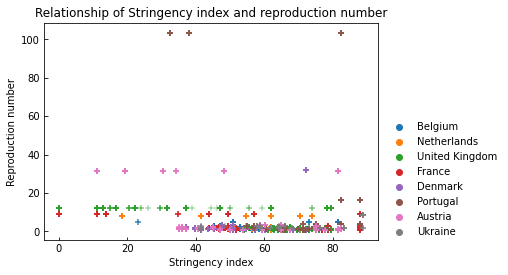

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()